# The ``rm_type`` Argument

By default, the JAVELIN module will ssume that the input light curves are spectroscopic light curves, and perform spectrooscopic reverberation mapping (RM) analysis. However, pyPetal can also analyze light curves using photometric RM analysis.

This can be changed with the ``rm_type`` argument, which can be either "spec" or "phot". 

.. warning:: JAVELIN's photometric RM analysis can only be done with two light curves, so ``together`` must be set to ``False`` if ``rm_type=phot``.

We can run the JAVELIN module assuming photometric light curves, only using the continuum and first line:

In [1]:
import pypetal.pipeline as pl

main_dir = 'test_repo/pypetal/examples/dat/javelin_'
filenames = [ main_dir + 'continuum.dat', main_dir + 'yelm.dat', main_dir + 'zing.dat' ]

line_names = ['continuum', 'line1', 'line2']


Running JAVELIN
--------------------
rm_type: phot
lagtobaseline: 0.3
laglimit: [[-1976.98849, 1976.98849]]
fixed: True
p_fix: True
subtract_mean: True
nwalker: 100
nburn: 100
nchain: 100
output_chains: True
output_burn: True
output_logp: True
nbin: 50
metric: med
together: False
--------------------
        
start burn-in
nburn: 100 nwalkers: 100 --> number of burn-in iterations: 10000
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/javelin_output4/line1/javelin/burn_cont.txt
start sampling
sampling finished
acceptance fractions for all walkers are
0.60 0.79 0.83 0.65 0.68 0.75 0.64 0.57 0.76 0.63 0.74 0.78 0.78 0.63 0.77 0.66 0.72 0.63 0.69 0.66 0.70 0.84 0.69 0.62 0.69 0.74 0.68 0.73 0.72 0.71 0.73 0.70 0.72 0.68 0.62 0.70 0.64 0.64 0.69 0.77 0.71 0.68 0.61 0.72 0.75 0.70 0.70 0.64 0.69 0.74 0.74 0.72 0.61 0.71 0.69 0.70 0.74 0.69 0.76 0.69 0.69 0.66 0.69 0.67 0.64 0.70 0.62 0.70 0.75 0.63 0.65 0.69 0.74 0.69 0.69 0.63 0.72 0.68 0.79 0.72 0.73 0.73 0.68 0.6

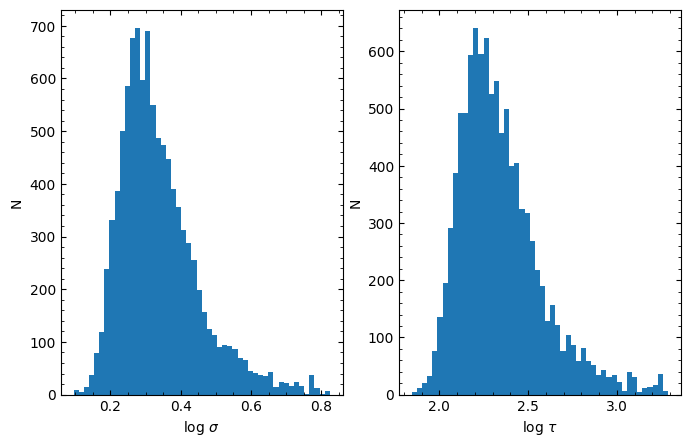

run single chain without subdividing matrix 
start burn-in
using priors on sigma and tau from continuum fitting
[[  1.733 134.959]
 [  2.063 199.85 ]
 [  2.734 351.426]]
penalize lags longer than 0.30 of the baseline
nburn: 100 nwalkers: 100 --> number of burn-in iterations: 10000
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/javelin_output4/line1/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.08 0.04 0.10 0.10 0.08 0.13 0.08 0.13 0.12 0.02 0.05 0.05 0.08 0.06 0.11 0.05 0.02 0.13 0.04 0.11 0.12 0.03 0.08 0.01 0.14 0.12 0.09 0.08 0.11 0.05 0.19 0.12 0.14 0.09 0.08 0.12 0.11 0.05 0.03 0.15 0.10 0.02 0.04 0.19 0.10 0.07 0.11 0.02 0.10 0.02 0.05 0.06 0.02 0.15 0.08 0.05 0.10 0.04 0.09 0.10 0.12 0.04 0.04 0.09 0.15 0.04 0.00 0.02 0.10 0.14 0.13 0.09 0.06 0.13 0.07 0.01 0.14 0.01 0.03 0.07 0.05 0.12 0.00 0.14 0.08 0.04 0.07 0.04 0.03 0.14 0.05 0.07 0.12 0.05 0.10 0.08 0.06 0.11 0.02 0.10
save MCMC chains to /home/stone28/projects/

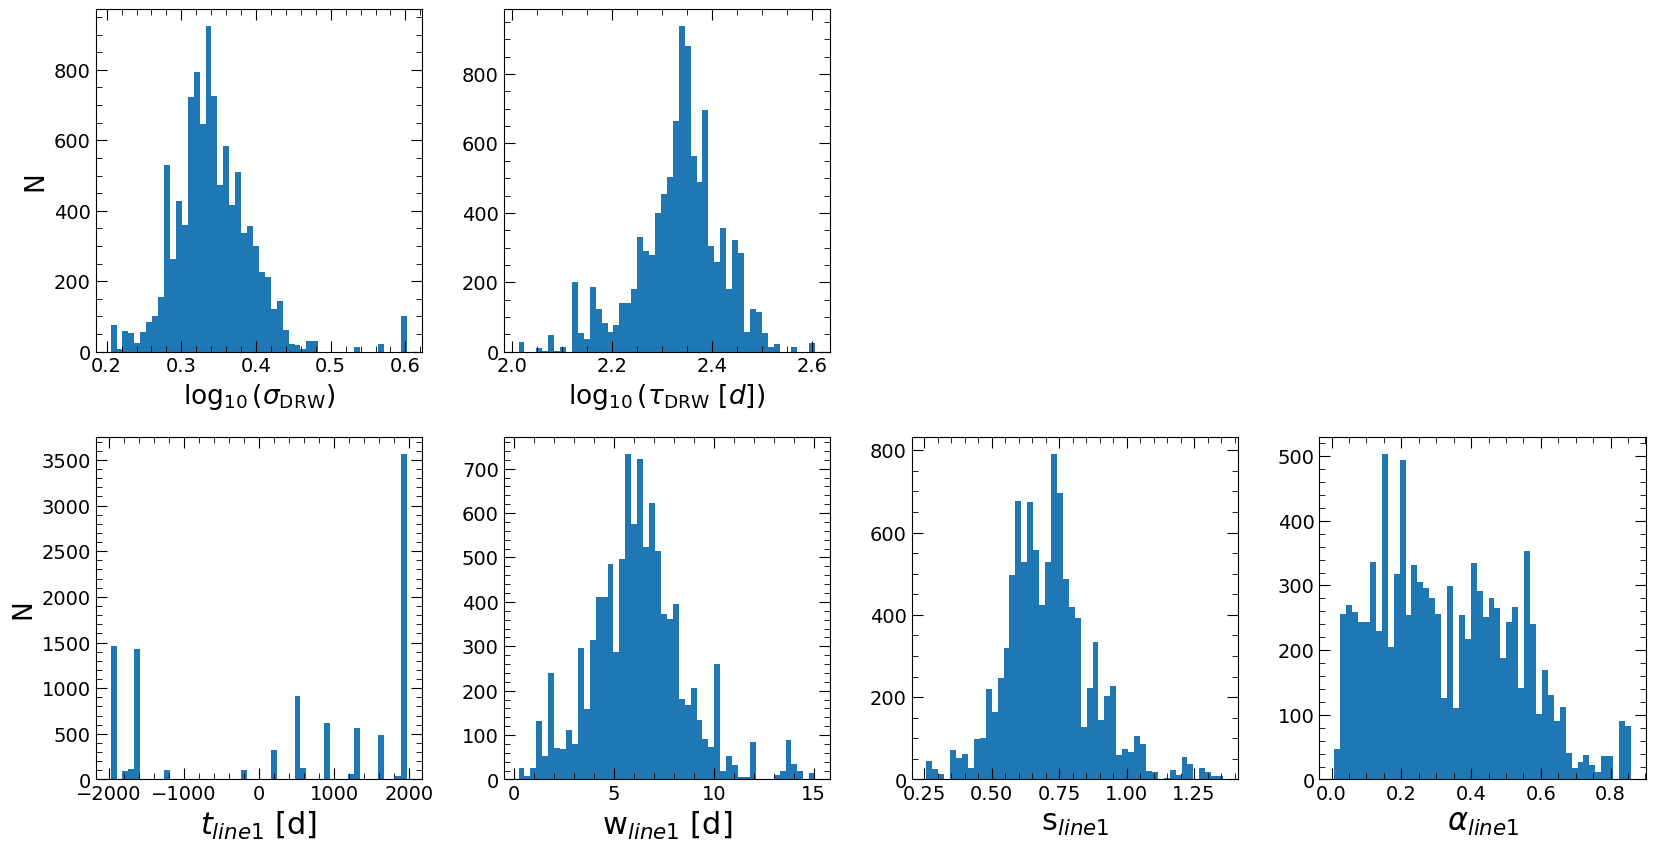

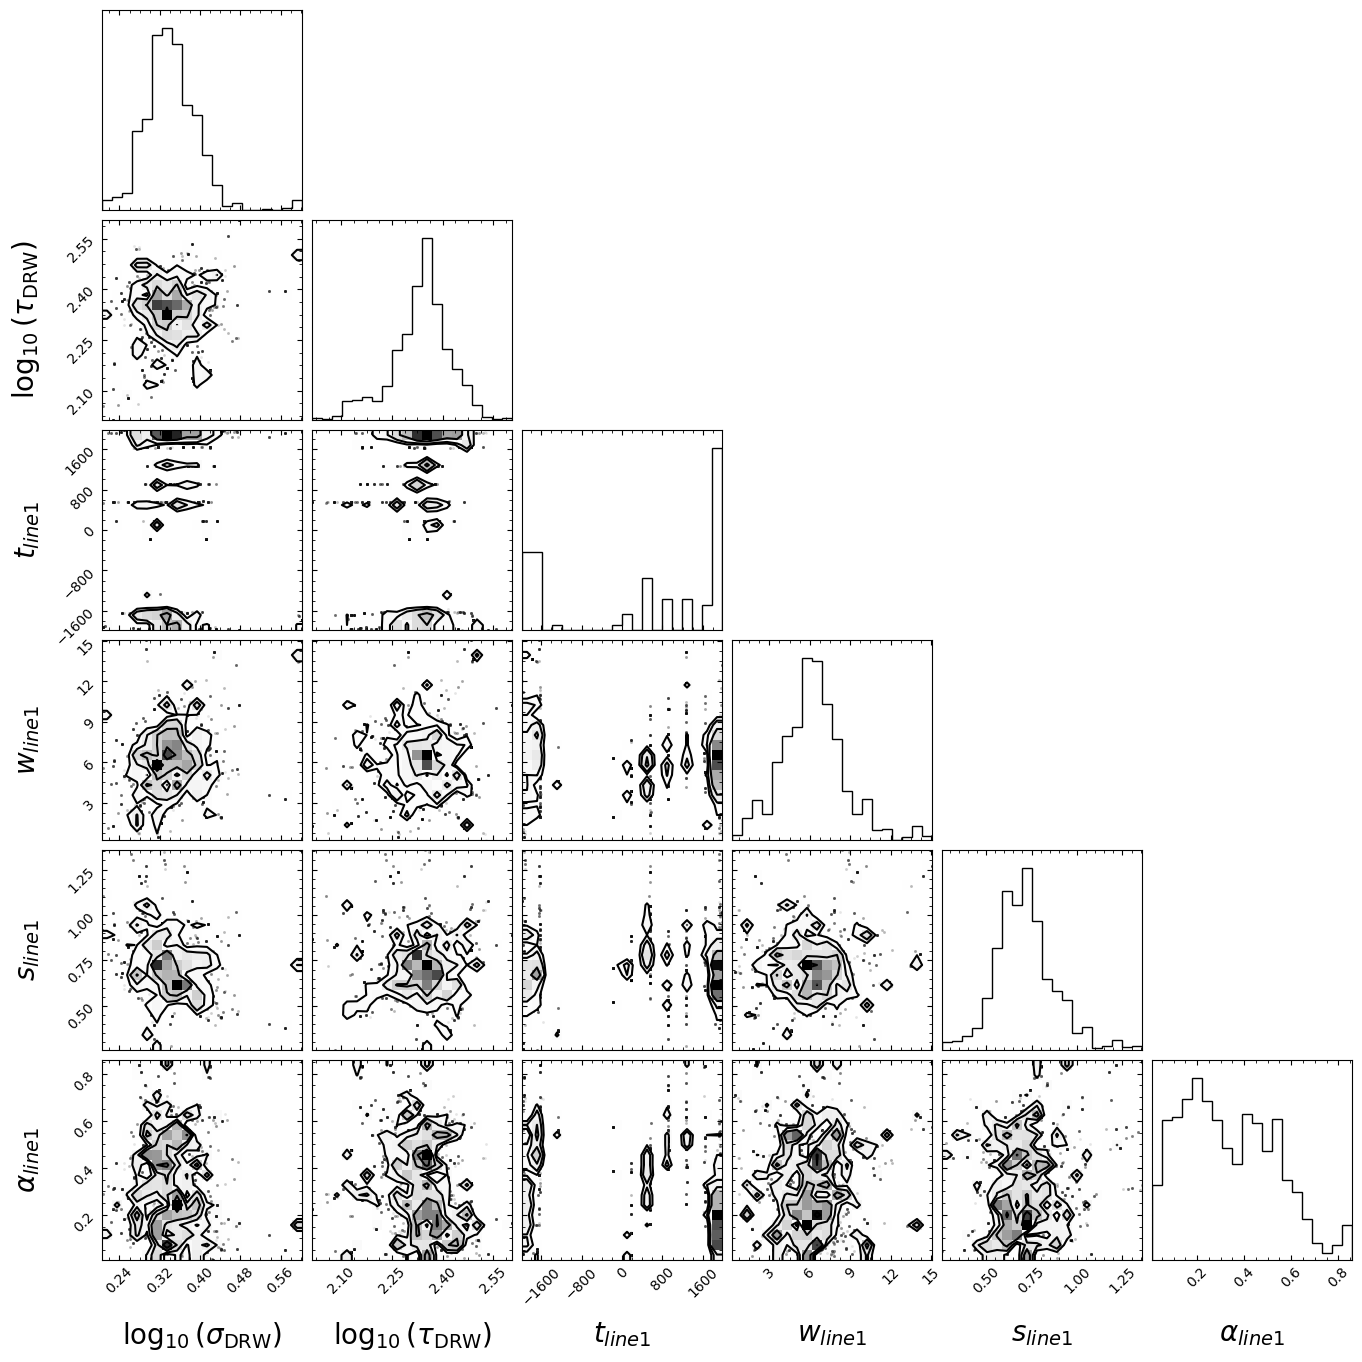

covariance matrix calculated
covariance matrix decomposed and updated by U


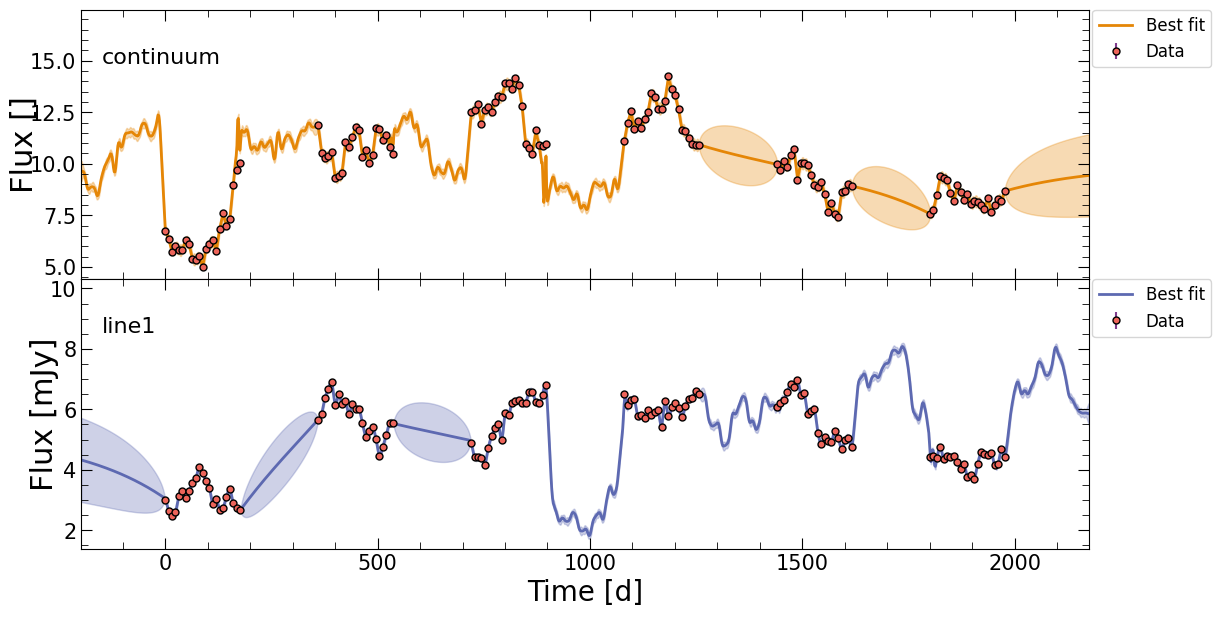

In [2]:
output_dir = 'javelin_output4/'

params = {
    'rm_type': "phot",
    'together': False
}

res = pl.run_pipeline( output_dir, filenames[:2], line_names[:2],
                 run_javelin=True,
                 javelin_params=params,
                 verbose=True,
                 plot=True,
                 file_fmt='ascii',
                 lc_unit=['', 'mJy'],
                 time_unit='d')

There are two main differences in the output dictionary (and data) for this case:

* ``rmap_model`` will return a ``javelin.lcmodel.Pmap_Model`` object instead of a ``javelin.lcmodel.Rmap_Model object``.
* There are 4 tophat parameters (t, w, s, $\alpha$) for each line instead of 3.

All other output data and files are the same as in the basic case.